# Teresa Practicing Gradient Descent for nD Linear Regression

### Overview:

After completing the [Machine Learning Specialization](https://www.coursera.org/specializations/machine-learning-introduction), Teresa will take the original [TL_Practice_2D_GradDec.ipynb]() file and...
- Modify it to analyse multidimensional data
- Add vectorization and normalization to the original linear regression code
- Use TensorFlow to compare results and performance

  
### Motivation:
- Practice supervised machine learning on multidimensional data
- Practice Data Visualization with multidimensional data
- Become more familiar with TensorFlow

## Step 0: Import all the necessary packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt # usually all we need from matplotlib
import matplotlib as mpl # just in case I need a more general mpl function than plyplot.
#%matplotlib widget 
# above enables interaction with plots produced by mpl
import pandas as pd
# more packages added later as needed.

# below tensorflow to check work
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Step 1: Load and Visualize Raw Data

### Load Data Using Pandas Package

Import the multi-dim houses.txt file provided by Andrew Ng using read_csv():

In [3]:
pd_housedata = pd.read_csv("data/houses.txt", names = ["Size (ft^2)","Num Beds", "Num Floors", "Age (Yrs)", "Price (1000$)"])

A couple things to note here:
- We did not have to specify type of delimeter because the file is already comma delimited (default for csv_read())
- We needed to add the *names = []* information because the original data did not come with headers.  By default, the first row of the text file becomes the header.

We will **confirm the data were successfully loaded** by simply displaying the data


In [4]:
pd_housedata

,Size (ft^2),Num Beds,Num Floors,Age (Yrs),Price (1000$)
0,952.0,2.0,1.0,65.0,271.5
1,1244.0,3.0,1.0,64.0,300.0
2,1947.0,3.0,2.0,17.0,509.8
3,1725.0,3.0,2.0,42.0,394.0
4,1959.0,3.0,2.0,15.0,540.0
...,...,...,...,...,...
95,1224.0,2.0,2.0,12.0,329.0
96,1432.0,2.0,1.0,43.0,388.0
97,1660.0,3.0,2.0,19.0,390.0
98,1212.0,3.0,1.0,20.0,356.0


We need to **convert this pandas DataFrame into a numpy array** before we can plot the data.

Code to do that, using pandas modules, below:

In [5]:
np_housedata = pd.DataFrame(pd_housedata).to_numpy()
np_housedata.shape

(100, 5)

### Plot the training data
Going to practice with subplots here to try and plot them all in one place...

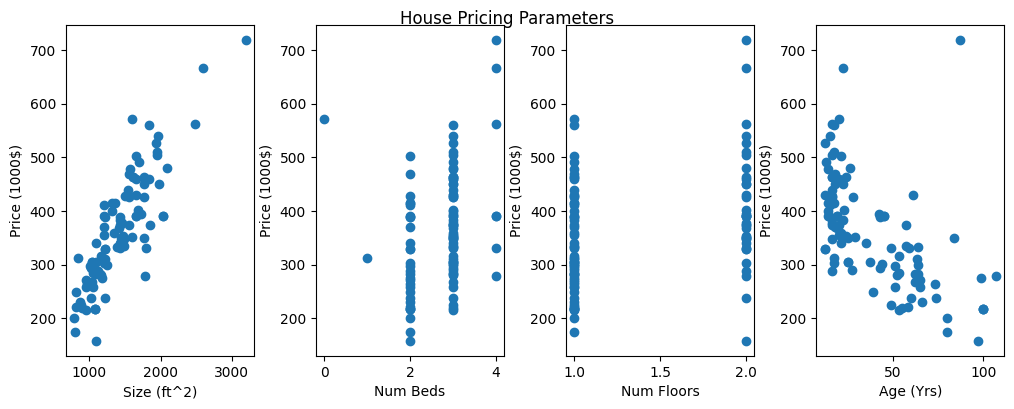

In [24]:
plt.close()
featnum = np_housedata.shape[1] -1
fig, ax = plt.subplots(1,featnum)
fig.suptitle("House Pricing Parameters")
fig.set_size_inches(10, 4)
for i in range(featnum):
    plt.subplot(1,featnum,i+1)
    plt.scatter(np_housedata[:,i],np_housedata[:,featnum])
    plt.xlabel(pd_housedata.columns[i])
    plt.ylabel(pd_housedata.columns[featnum])
fig.tight_layout(pad=0.2)
plt.show()


## Step 2: Data Processing

### Normalization:

In [27]:
def norm_zscore(X,y,norm_y = False):
    """
    Inputs:
        X : Feature matrix of data set (num_example x num_feature Numpy Array)
        y : y vector (num_example length Numpy Column Vector )
    Output:
        X_norm: Z-score Normalized Feature Matrix
        x_consts: Matrix containing Feature Means and Feature Stds 2 x numfeatures np array 
        y_norm: Z-score Normalized Target column if norm_y = True
        y_consts: Column Vector containing mean and std of Target values
    """
    ex_num = X.shape[0]
    x_means = np.mean(X,0)
    x_stds = np.std(X,0)
    x_consts = np.array([x_means,x_stds])
    X_norm = (X - x_means)/x_stds
    if norm_y:
        y_mean = np.mean(y)
        y_std = np.std(y)
        y_norm = (y - y_mean)/y_std
        y_consts = np.array([y_mean,y_std])
    else:
        y_norm = np.empty((ex_num,))
        y_consts = np.empty((ex_num,))
    return X_norm, x_consts, y_norm, y_consts

In [517]:
X = np_housedata[:,0:featnum]
y = np_housedata[:,featnum]
X_norm, x_consts, _, _ = norm_zscore(X,y)
#print(X_norm)
#print(y)

### Plot the Normalized Features vs Price

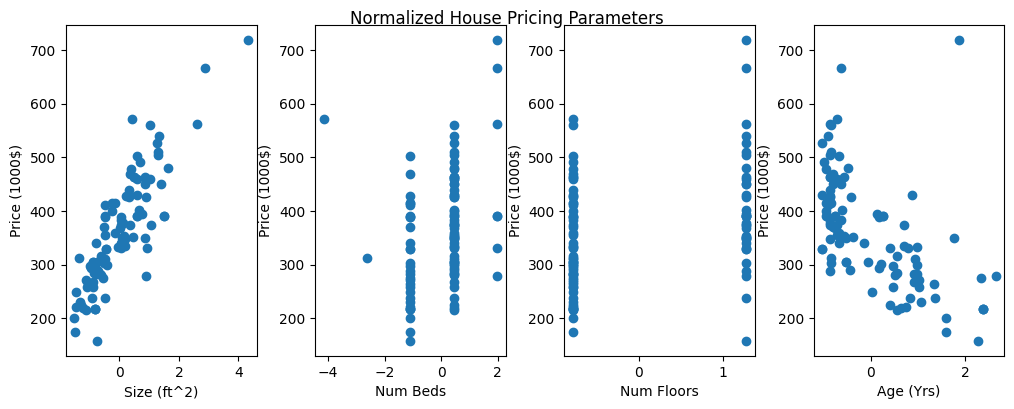

In [189]:
plt.close()
fig, ax = plt.subplots(1,featnum)
fig.suptitle("Normalized House Pricing Parameters")
fig.set_size_inches(10, 4)
for i in range(featnum):
    plt.subplot(1,featnum,i+1)
    plt.scatter(X_norm[:,i],y)
    plt.xlabel(pd_housedata.columns[i])
    plt.ylabel(pd_housedata.columns[featnum])
fig.tight_layout(pad=0.2)
plt.show()

## Step 3: Use TensorFlow to Predict the Model

Me trying to use tensorflow on my own for the first time...

In [207]:
#### Defining my super simple model
from tensorflow.keras.layers import Dense as Dense
model = tf.keras.Sequential([
    tf.keras.Input(shape=(4,)), # want to indicate that there are 4 features
    Dense(units = 1, activation = "linear") # want 1 linear regression node
], name = "model")
model.summary()
model.save_weights('init.weights.h5') # saving initial weights to be used later


Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_47 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (20.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

### Some data processing...

In [572]:
#### I need to split my dataset so I can cross validate / test performance of my model
tf_dataset = tf.data.Dataset.from_tensor_slices((X_norm, y)) # But first I need data to be in tf.data.Dataset format
train_dataset, other_dataset = tf.keras.utils.split_dataset(
    tf_dataset, left_size=0.6, right_size=0.4, shuffle=False
)

#### splitting leftover data into cross validation and test set
cv_dataset, test_dataset = tf.keras.utils.split_dataset(
    other_dataset, left_size=0.5, right_size=0.5, shuffle=False
)
train_len = train_dataset.cardinality().numpy()
cv_len = cv_dataset.cardinality().numpy()

# batching required in order to pass tf.data.Dataset into model.fit
train_dataset = train_dataset.batch(train_len)
cv_dataset = cv_dataset.batch(20)

for element in train_dataset:
    print(element)
for element in cv_dataset:
    print(element)

#print(cv_batchsize)
#print(cv_dataset.get_single_element()[0]) # extracts first element (Feature Matrix) of the training set from the Batched tf.data.Dataset

(<tf.Tensor: shape=(60, 4), dtype=float64, numpy=
array([[-1.12018542, -1.08793896, -0.78288136,  1.02191098],
       [-0.41174475,  0.44436943, -0.78288136,  0.98312878],
       [ 1.29385043,  0.44436943,  1.27733275, -0.83963464],
       [ 0.75524143,  0.44436943,  1.27733275,  0.12992037],
       [ 1.32296443,  0.44436943,  1.27733275, -0.91719904],
       [-0.24191308, -1.08793896, -0.78288136, -0.95598124],
       [-1.33368809, -1.08793896, -0.78288136,  1.06069319],
       [ 1.02454593,  0.44436943, -0.78288136, -0.83963464],
       [-0.94064908,  0.44436943, -0.78288136,  0.16870257],
       [ 4.31928028,  1.97667783,  1.27733275,  1.8751194 ],
       [-1.51807676, -1.08793896, -0.78288136,  1.60364399],
       [-0.51849608, -1.08793896,  1.27733275, -0.83963464],
       [ 0.34764542, -1.08793896, -0.78288136, -0.80085244],
       [ 0.03952226,  0.44436943, -0.78288136, -0.72328804],
       [-0.46997275, -1.08793896, -0.78288136, -0.91719904],
       [-0.78052208, -1.08793896, -

### Creating a loop to compare different alpha (learning rate) values

In [573]:
from tensorflow.keras.losses import MeanSquaredError
alpha_range = np.geomspace(0.05,50,10)
num_epochs = 100
train_losses = np.empty((len(alpha_range),num_epochs))
cv_losses = np.empty((len(alpha_range),num_epochs))
weights = np.empty((featnum,len(alpha_range)))
biases = np.empty((1,len(alpha_range)))
for alpha in enumerate(alpha_range):
     opt = keras.optimizers.Adam(learning_rate=alpha[1]) # Required in order to converge below 1000 epochs
     model.load_weights('init.weights.h5') # when fitting model iteratively, it will use last instance of weights unless reset to initial
     model.compile(loss=MeanSquaredError(),optimizer = opt) # Chose mean squared error loss because that's what I'll use in my code
     # Apparently you can add your validation set into model.fit and compare losses real time instead of after:
     history = model.fit(train_dataset, epochs=num_epochs, initial_epoch = 0, batch_size = cv_len, validation_data=(cv_dataset))
     weight = model.layers[0].get_weights()[0]
     bias = model.layers[0].get_weights()[1]
     weights[:,alpha[0]] = weight[:,0] # required to transform the (4,) into (4,1)
     biases[:,alpha[0]] = bias
     train_losses[alpha[0],:] = history.history["loss"]
     cv_losses[alpha[0],:] = history.history["val_loss"]

Epoch 1/100


/Users/teresa/Anaconda/anaconda3/envs/AndrewNg/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 6 variables whereas the saved optimizer has 0 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - loss: 152111.6094 - val_loss: 129015.7031
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 152050.2344 - val_loss: 128980.8594
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 151988.9062 - val_loss: 128946.0391
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 151927.5781 - val_loss: 128911.2344
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 151866.2812 - val_loss: 128876.4766
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 151805.0312 - val_loss: 128841.7266
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 151743.7969 - val_loss: 128807.0156
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 151682.5938 - val_loss: 128772.3359
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 151621.4375 - val_loss: 128737.6641
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 151560.2969 - val_loss: 128703.0391
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 151499.1875 - val_los

### Plotting the loss vs epochs for each learning rate to compare efficiency

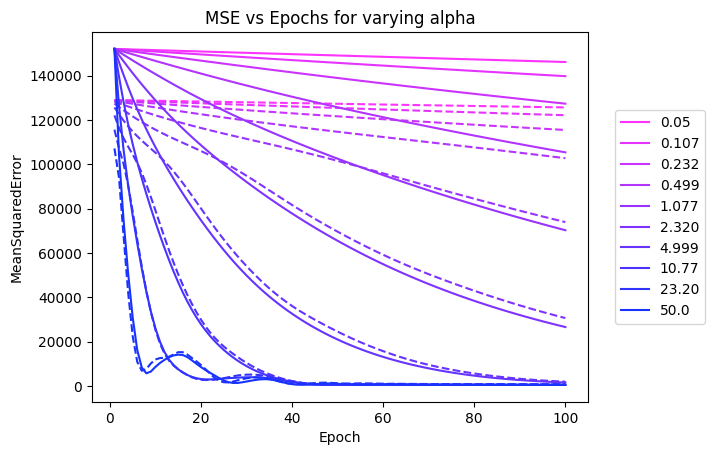

In [574]:
plt.close()
for alpha in enumerate(alpha_range):
    frac = 0.1*alpha[0]
    color = (1-frac,.2,1)
    epochrange = np.arange(1,num_epochs+1,1)
    plt.plot(epochrange,train_losses[alpha[0],:], label = '{:1.5}'.format(str(alpha[1])), color = color)
    plt.plot(epochrange,cv_losses[alpha[0],:], linestyle = '--', color = color )
plt.title("MSE vs Epochs for varying alpha")
plt.ylabel("MeanSquaredError")
plt.xlabel("Epoch")
plt.legend(loc = 'center right', bbox_to_anchor=(1.25, 0.5))
plt.show()

 Solid Line is Training Set, Dashed Line is Cross Validation Set

 alpha = 10.77 appears to be the best, but it's a larger value of alpha than I thought was normal...
 ### Will try to extract the target values for my model from this...

In [659]:
best_it = 7
w_ideal = weights[:,best_it]
b_ideal = biases[:,best_it]
tf_J_train = train_losses[best_it,-1]
tf_J_cv = cv_losses[best_it,-1]
print(f"Tensorflow Predicted Weights: {w_ideal}")
print(f"Tensorflow Predicted Bias: {b_ideal}")
print(f"Tensorflow Predicted J(train)_min: {tf_J_train}")
print(f"Tensorflow Predicted J(cv)_min: {tf_J_cv}")

Tensorflow Predicted Weights: [112.70546722 -23.91218567 -29.9927063  -37.19173431]
Tensorflow Predicted Bias: [361.69512939]
Tensorflow Predicted J(train)_min: 421.9407653808594
Tensorflow Predicted J(cv)_min: 651.1900634765625


## Step 4: Code the Gradient Descent for a MultiLinear Regression

### Create a function for the prediction vector

In [386]:
# Function to Predict Costs Based on SF:
def calculate_f_wb(w,b,X):
    """
    Inputs:
        w: paramater column vector
        b: bias (scalar)
        X: nxm Feature Matrix with columns being features and rows being examples
    Outputs:
        f_wb: column vector with predicted values f_wb = w1x1 + w2x2 + w3x3 + ... + b for each example
    """
    f_wb = np.matmul(X,w) + b
    return f_wb

Test calculate_f_wb Cell

In [509]:
# X and y already previously defined
w = np.ones((X.shape[1],))
b = 0
fwb_vector = calculate_f_wb(w,b,X_norm)

if np.array_equal(w,np.ones((X.shape[1],))) and b==0:
    if np.array_equal(fwb_vector,np.sum(X_norm,1)):
        print("Success")
    else:
        print("Failed")

if np.array_equal(w,np.zeros((X.shape[1],))) and b==0:
    if np.array_equal(fwb_vector,np.zeros((X_norm.shape[0],))):
        print("Success")
    else:
        print("Failed")

if np.array_equal(w,np.zeros((X.shape[1],))) and b==1:
    if np.array_equal(fwb_vector,np.ones((X_norm.shape[0],))):
        print("Success")
    else:
        print("Failed")

#print(fwb_vector)


Success


### Calculate and Visualize the Cost Function

In [453]:
def calculate_J_wb(w,b,X,y):
    """
    Function to calculate the cost function
    Inputs:
        w: paramater column vector
        b: bias (scalar)
        X: Feature Matrix (m x n Matrix with columns being features and rows being examples)
        y: Target values (column vector)
    Output:
        J: The total cost value with current parameters w and b (Scalar)
        Will produce an array of values J_{ij}(w,b) where w = wv[i,j] and b = bv[i,j]
    """
    n = X.shape[1]
    m = X.shape[0]
    f_wb = calculate_f_wb(w,b,X)
    J = 0.5*np.mean((np.square(f_wb - y)))
    
    return J


Test calculate_J_wb Cell 

In [580]:
test_J = calculate_J_wb(w_ideal,b_ideal,X_norm,y)
test_fwb = calculate_f_wb(w_ideal,b_ideal,X_norm)
print(f"Teresa code predicted cost: {test_J}")
tf_J = 0.5*tf.keras.losses.MSE(y, test_fwb).numpy()
print(f"Tensorflow predicted cost: {tf_J}")

Teresa code predicted cost: 226.22424768402655
Tensorflow predicted cost: 226.2242476840265


### Code the Partial Derivative function
1. Function to calculate partial derivates of J(w,b)
   - As a reminder, they are this:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x_j^{(i)} \tag{1}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}\\
\end{align}
$$

   - Note that the partial derivative of $J$ with respect to $w$ is *different* for each feature

In [503]:
def calculate_dJ(w,b,X,y):
    """ 
    Calculates the partial derivatives of linear regression cost function, J(w,b), for some value of w and b.
    Inputs:
        w: paramater column vector
        b: bias (scalar)
        X: Feature Matrix (m x n Matrix with columns being features and rows being examples)
        y: Target values (column vector)
    Outputs:
        dJ: Column vector of partial derivative values 
    """
    m = X.shape[0]
    n = X.shape[1]
    dJ = np.zeros((n+1,))
    f_wb = calculate_f_wb(w,b,X)
    for i in range(n):
        X_j = X[:,i]
        dJ[i] = (1/m)*np.dot((f_wb - y),X_j)
    dJ[n] = (1/m)*np.sum(f_wb - y)

    return dJ

Test calculate_dJ Cell

In [581]:
my_dJ = calculate_dJ(w_ideal,b_ideal,X_norm,y)
print(f"My dJ = {my_dJ}")

# Using tensorflow to test accuracy of my code
X_tftest = tf.constant(X_norm)
y_tftest = tf.constant(np.reshape(y,(100,1)))
w_tftest = tf.Variable(tf.constant(np.reshape(w_ideal,(4,1))))
b_tftest = tf.Variable(tf.constant(np.reshape(b_ideal,(1,1))))

with tf.GradientTape(persistent=True) as tape:
  fwb_tftest = tf.matmul(X_tftest, w_tftest) + b_tftest
  J_tftest = 0.5*tf.reduce_mean(tf.math.square(tf.math.subtract(fwb_tftest,y_tftest)))

# print(f"My J: {test_J}")
# print(f"TF Loss: {loss}")
[tf_dJdw, tf_dJdb] = tape.gradient(J_tftest,[w_tftest, b_tftest])
print(f"TF dJdW = {tf_dJdw}")
print(f" TF dJdB = {tf_dJdb}")

  

My dJ = [ 2.17354799 -0.28938428  2.88391905 -0.37073598 -0.54439061]
TF dJdW = [[ 2.17354799]
 [-0.28938428]
 [ 2.88391905]
 [-0.37073598]]
 TF dJdB = [[-0.54439061]]


### Function to perform multilinear gradient descent:
$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w_j &= w_j -  \alpha \frac{\partial J(w,b)}{\partial w_j} \tag{3}  \; \newline 
b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
   

In [642]:
def run_grad_dec(w,b,X,y,alpha,iterations = 100):
    """ 
    Finds the values of w and b that minimizes the least squares cost function for linear model.
    Inputs:
        w: initial paramaters (Column vector)
        b: initial bias (Scalar)
        X: Training Feature Matrix (m x n Matrix with columns being features and rows being examples)
        y: Training Target values (Column vector)
        alpha : Learning rate for ML algorithm (Scalar)
        iterations: number of iterations to run before stopping algorithm (Scalar)
    Outputs:
        w_final: w parameter values at last iteration (Column Vector)
        b_final: b parameter at last iteration (Scalar)
        J_history: Cost for each iteration (Column vector)
    """
    n = X.shape[1]
    m = X.shape[0]

    w_current = w
    b_current = b

    print("\n Initiating Teresa's Gradient Descent...")
    J_history = np.zeros((iterations,))
    for i in range(iterations):
        if (i+1)%100 == 0:
            print(f"\n Running {i+1}/{iterations}.")
        J_history[i] = calculate_J_wb(w_current,b_current,X,y)
        dJ = calculate_dJ(w_current,b_current,X,y)
        w_temp = np.zeros((n,))
        for j in range(n):
            w_temp[j] = w_current[j] - alpha*dJ[j]
        b_temp = b_current - alpha*dJ[n]
        w_current = w_temp
        b_current = b_temp
    w_final = w_current
    b_final = b_current
    print("\n Finished The Gradient Descent")
      
    return w_final, b_final, J_history

## Step 5: Run Gradient Descent

In [653]:
# Convert tf data back into numpy
X_train = train_dataset.get_single_element()[0].numpy()
#print(X_train)
y_train = train_dataset.get_single_element()[1].numpy()
#print(y_train)
X_cv = cv_dataset.get_single_element()[0].numpy()
y_cv = cv_dataset.get_single_element()[1].numpy()

m = X_train.shape[0]
n = X_train.shape[1]
# Run my version of the gradient descent:
alpha = 0.1
iterations = 100
w_init = np.zeros((n,))
b_init = 0
w_final, b_final, J_hist = run_grad_dec(w_init,b_init,X_train,y_train,alpha,iterations)


 Initiating Teresa's Gradient Descent...

 Running 100/100.

 Finished The Gradient Descent


### Plot the Cost vs Iterations

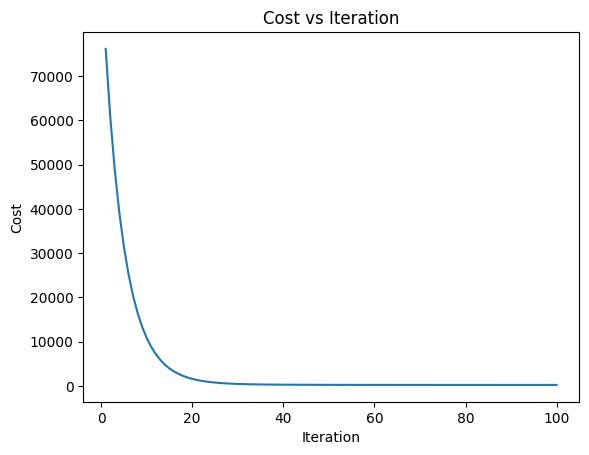

In [654]:
plt.close()
plt.plot(range(1,iterations+1),J_hist)
plt.title("Cost vs Iteration")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

### Report My Final Values and Compare with Tensorflow

In [660]:
print(f"Teresa's Final Ws: {w_final}")
print(f"Tensorflow's Final Ws {w_ideal}")
print(f"Teresa's Final b: {b_final}")
print(f"Tensorflow's Final b: {b_ideal}")
print(f"Teresa Final J: {J_hist[-1]}")
print(f"Tensorflow J_min: {tf_J_train}")

Teresa's Final Ws: [111.05894849 -23.00064028 -29.20480066 -37.88991059]
Tensorflow's Final Ws [112.70546722 -23.91218567 -29.9927063  -37.19173431]
Teresa's Final b: 362.9661599462734
Tensorflow's Final b: [361.69512939]
Teresa Final J: 210.93663821608575
Tensorflow J_min: 421.9407653808594


### Do a Prediction on the Cross Validation Set and Compare Cost

In [661]:
J_cv = calculate_J_wb(w_final,b_final,X_cv,y_cv)
print(f"Teresa's J_cv = {J_cv}")
print(f"Tensorflow J_cv = {tf_J_cv}")


Teresa's J_cv = 325.94202490747614
Tensorflow J_cv = 651.1900634765625


<span style="font-size:1.5em;">So it would appear I need to learn how to use Tensforlow better (I knew that), because my rudimentary linear regression algorithm is performing better than my tensorflow attempt to solve the problem... </span>

But for now...

## GOOD ENOUGH